size of Data: (8523, 12)
['Regular' 'Low Fat' 'low fat' 'LF' 'reg']
['Regular' 'Low Fat']
Total Sales: $1,201,681
Average Sales: $141
no of items sold: $8,523
Average Rating: $4


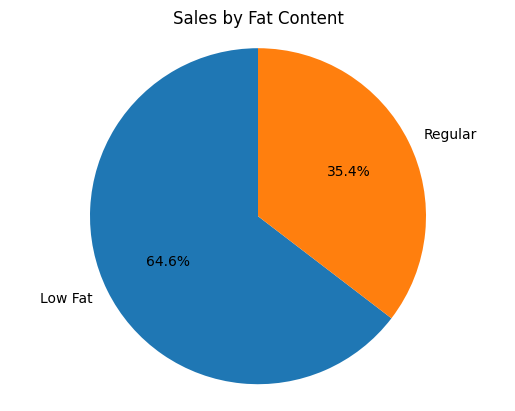

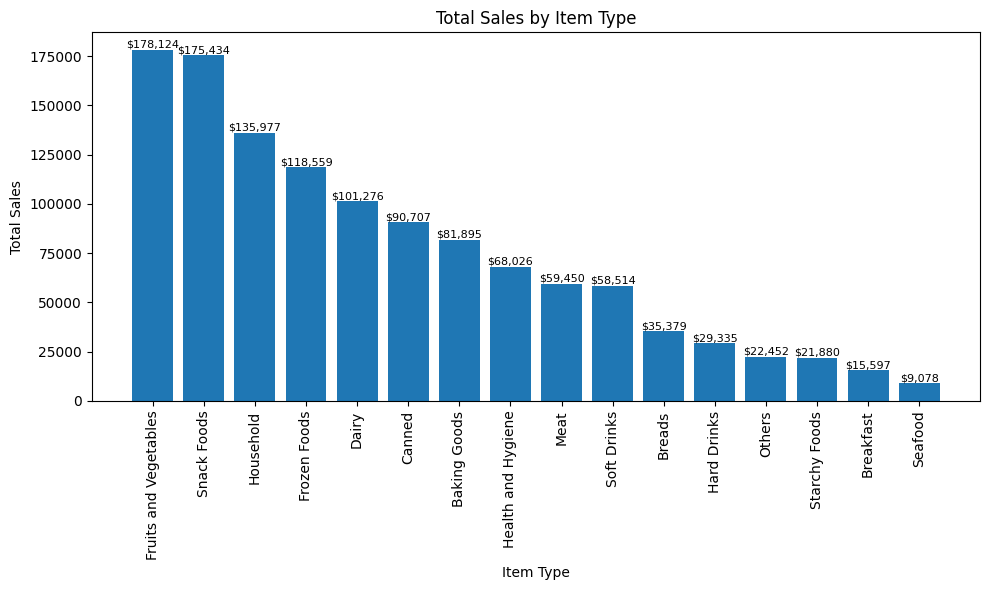

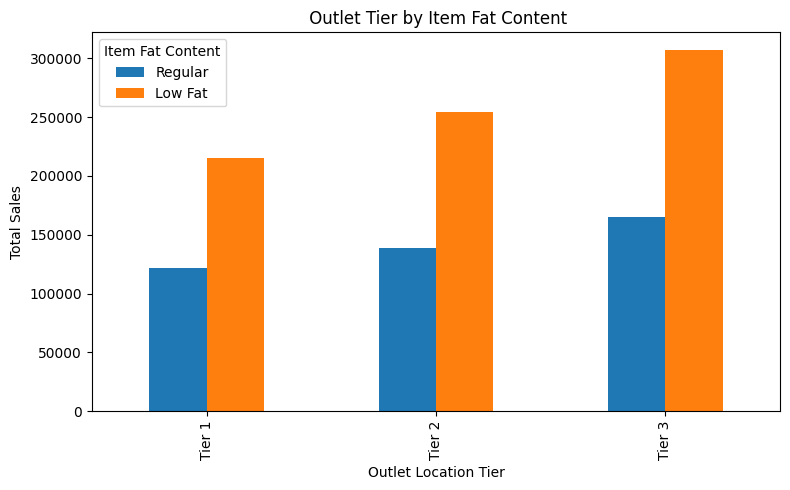

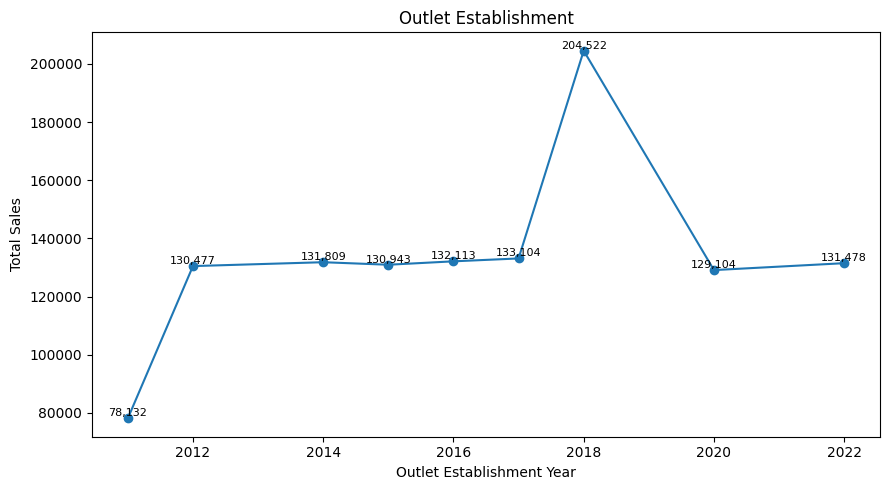

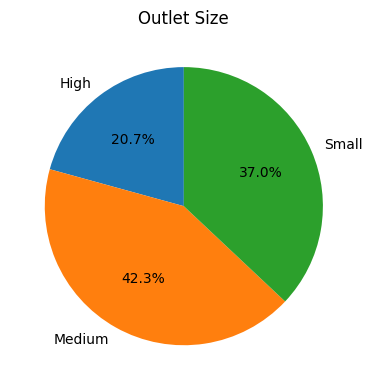

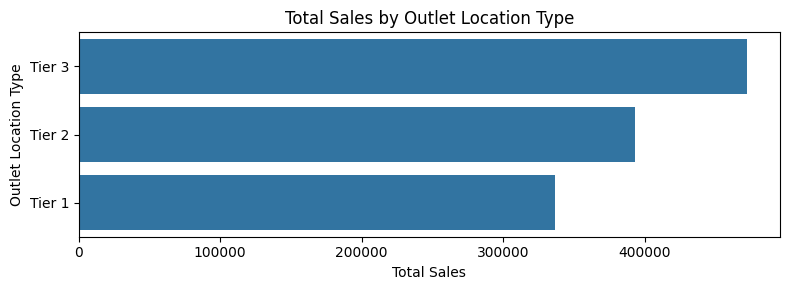

In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT RAW DATA
data = pd.read_excel("C:/Users/ayand/Documents/BlinkIT/BlinkIT Data.csv.xlsx")

#EXPLORE DATA
data.head(10)
data.tail(10)
data.tail(15)
data.shape

#SAMPLE DATA
print("size of Data:", data.shape)

#FIELD INFO
data.columns

#DATA TYPES
data.dtypes

#DATA CLEANING
print(data['Item Fat Content'].unique())
data['Item Fat Content'] = data['Item Fat Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
print(data['Item Fat Content'].unique())

#BUSINESS REQUIREMENTS

#KPI's REQUIREMENTS

#Total Sales
total_sales = data['Sales'].sum()

#Average Sales
avg_sales = data['Sales'].mean()

#no of items sold
no_of_items_sold = data['Sales'].count()

#average Rating
avg_Rating = data['Rating'].mean()

#Display

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"no of items sold: ${no_of_items_sold:,.0f}")
print(f"Average Rating: ${avg_Rating:,.0f}")


#CHART ANALYSIS
#Total Sales by fat content

sales_by_fat = data.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%.1f%%', startangle=90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#Total Sales by Item Type
sales_by_type = data.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


#Fat Content by Outlet For Total Sales
grouped = data.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8,5), title=' Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#Total Sales by Outlet establishment
Sales_by_year = data.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(Sales_by_year.index, Sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip(Sales_by_year.index, Sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
plt.show()


#Sales by Outlet Size
sales_by_size = data.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()


#Sales by Outlet Location
sales_by_location = data.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()